# Práctica #8

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

df = pd.read_csv('../Analysis/team_stats_by_year.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

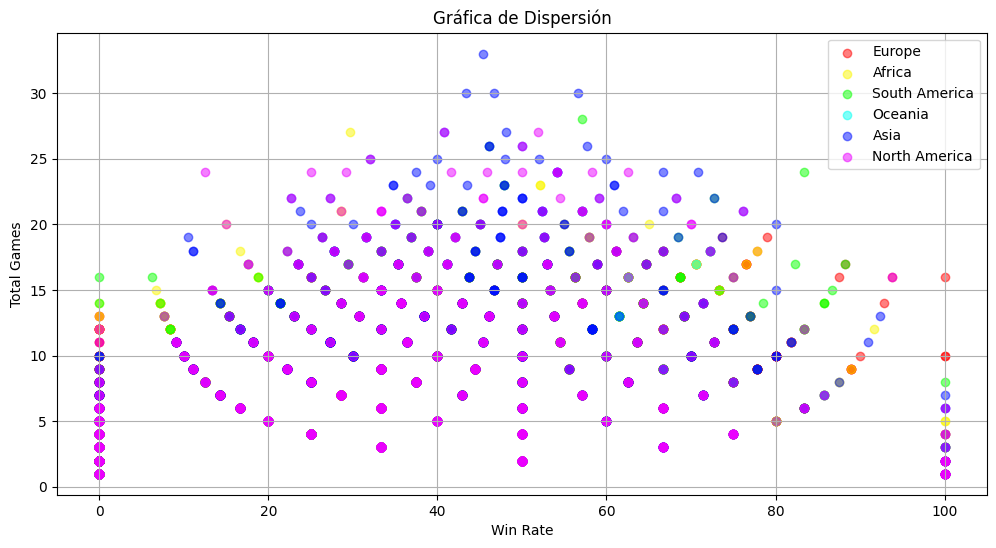

In [23]:
def get_cmap(n, name="hsv"):
    """Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name."""
    return plt.cm.get_cmap(name, n)

def data_dispersion(labelx, labely, df):
  continents = df['Continent'].unique()
  cmap = get_cmap(len(continents) + 1)
  plt.figure(figsize=(12, 6))
  for i, continent in enumerate(continents):
      subset = df[df['Continent'] == continent]
      plt.scatter(subset[labelx], subset[labely], label=continent, color=cmap(i), alpha=0.5)
  plt.legend()
  plt.title('Gráfica de Dispersión')
  plt.xlabel('Win Rate')
  plt.ylabel('Total Games')
  plt.grid(True)
  plt.show()

data_dispersion('Win Rate', 'Total Games', df)

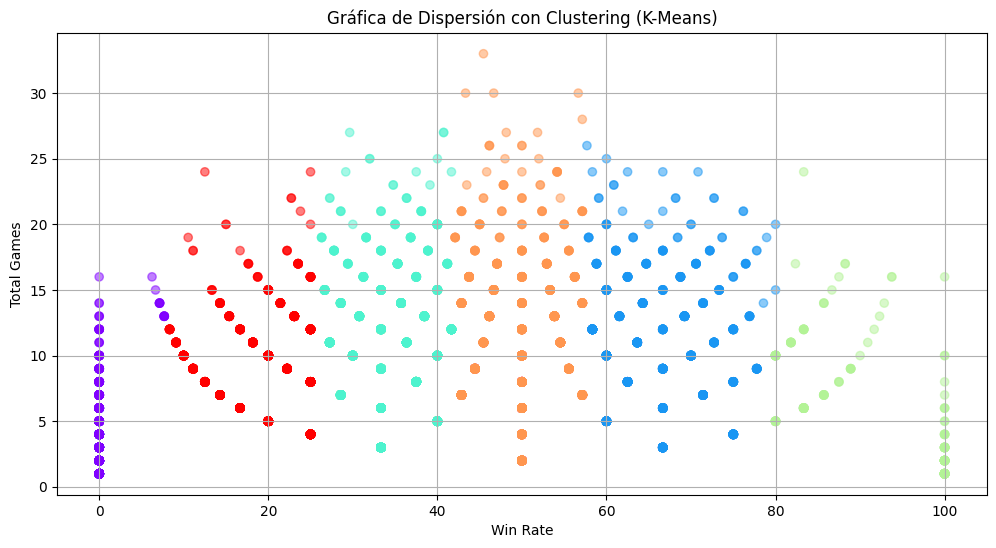

In [24]:
# Seleccionar las características
X = df[['Win Rate', 'Total Games']]
# Crear un modelo de KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
plt.scatter(df['Win Rate'], df['Total Games'], c=df['Cluster'], cmap='rainbow', alpha=0.5)
plt.title('Gráfica de Dispersión con Clustering (K-Means)')
plt.xlabel('Win Rate')
plt.ylabel('Total Games')
plt.grid(True)
plt.show()